 # **Homework 1 : Multi-armed Bandit**

## **Part 1 : Setting up Multi-armed Bandit**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

 The code below, implementation for a bandit problem where I can initialize bandits with random rewards and pull a specific bandit to get a simulated reward. The class can be used as a foundation for implementing various bandit algorithms for exploration and exploitation in reinforcement learning scenarios.

In [2]:
class Bandit:
    def __init__(self, n_bandits):
        self.n_bandits = n_bandits
        self.rewards = np.random.normal(0, 1, self.n_bandits)

    def pull_bandit(self, ind_bandit):
        if ind_bandit < 0 or ind_bandit >= self.n_bandits:
            print (ValueError(f"There is no bandit {ind_bandit} please entry new n_bandit"))
        
        reward = np.random.normal(self.rewards[ind_bandit], 1)
        return reward

The code below, simulates an agent interacting with a multi-armed bandit problem, updating its `q_values` based on the rewards received, and plotting the cumulative rewards over time. The plot provides insights into how well the agent is learning to choose actions that lead to higher rewards.

[1.4806013201174568, 1.357569157846536, 1.1862360751837704, 1.3246185107109985, -0.03682492993358688, 1.6057366489045175, 0.20347386909443, 1.3643905630014321, 0.6792738990680091, -0.26417913160772566, 2.3595274823977275, 0.24848543155448, 0.8747296146789723, 1.0627132258752692, 2.4482123280228416, 1.7589642259183487, -0.37713344659134174, 0.45051368822018967, -0.11866898776581591, 0.9299020560615641, 1.6162695760673222, 1.4111501456547675, 0.7553884445556235, 0.8632546893087716, 1.557933964514801, 2.17831290921812, 1.4129434554375409, 2.4429539752366223, 1.8050962276201377, 0.4586840843716905, -0.7543928388750597, 0.29801776228056365, -0.5525379392106485, 0.6087259453613582, 0.4743150164115408, -0.03812574700514715, -0.01454995359815725, 2.0692142853150886, 0.8742073891047107, -0.7434624926612429, 0.5288017215962835, -0.876749951644178, -0.11002079144776544, 1.0342111579188962, 1.2226748174655209, 2.1135717381773578, 0.7328348412908514, 0.5779906436597531, 2.6203719847475835, 1.781516

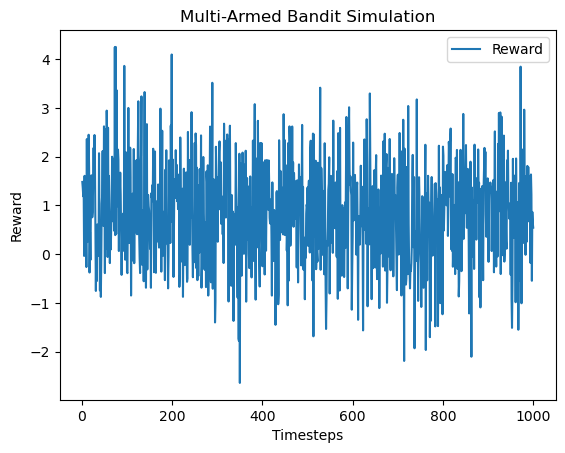

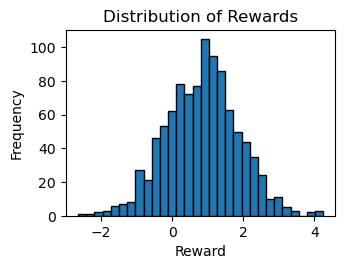

In [10]:
class Agent:
    def __init__(self, n_bandits):
        self.n_bandits = n_bandits
        self.q_values = np.zeros(self.n_bandits)
        self.action = np.zeros(self.n_bandits)
        
    def select_action(self):
        chosen_action = np.argmax(self.q_values)
        return chosen_action
    
    def update_q_values(self, chosen_action, reward):
        self.action[chosen_action] += 1
        self.q_values[chosen_action] += (reward - self.q_values[chosen_action]) / self.action[chosen_action]

def run_simulation(agent, bandit, num_steps):
    rewards = []
    for _ in range(num_steps):
        chosen_bandit = agent.select_action()
        reward = bandit.pull_bandit(chosen_bandit)
        agent.update_q_values(chosen_bandit, reward)
        rewards.append(reward)
    return rewards

# Example usage:
num_bandits = 5
num_steps = 1000

bandit_instance = Bandit(num_bandits)
agent_instance = Agent(num_bandits)

rewards = run_simulation(agent_instance, bandit_instance, num_steps)
print(rewards)

# Plotting results
plt.plot(range(1, num_steps + 1), rewards, label="Reward")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.title("Multi-Armed Bandit Simulation")
plt.legend()
plt.show()

# Plotting a histogram of rewards
plt.subplot(2, 2, 2)
plt.hist(rewards, bins=30, edgecolor='black')
plt.xlabel("Reward")
plt.ylabel("Frequency")
plt.title("Distribution of Rewards")

plt.tight_layout()
plt.show()

as you see the result that the specific characteristics of the histogram depend on the parameters of the normal distribution used to generate rewards `(np.random.normal(0, 1, self.n_bandits))`, as well as the behavior of my agent in selecting bandits and updating `q_values`. The histogram provides a visual summary of the reward dynamics in my multi-armed bandit simulation.

## **Part 2 : Implementing epsilon-greedy algorithm**

The code below is epsilon-greedy strategy on a multi-armed bandit problem, and the plot helps visualize how the average rewards evolve over time for each bandit.

[[0.6863471901816416, 0.22049102389917474, -0.7142621177504196, -1.0672380919375468, -0.8006025196434907, -1.337728581286735, 0.595339989634114, -2.14916434351381, 0.21508458999199265, -0.09538301983427555, -0.23400046801662638, -0.31856684795263046, -0.29542443488470793, -1.0645954137322158, -1.4450533337746603, -1.5612379104755674, -1.0104182365596848, -1.921496477088258, -1.1371868310068165, 0.3756400284452073, -0.7421366321191499, 1.2017909355914322, -1.672619803603843, 0.048609970184357976, 0.8795641182592515, -1.6561547284438893, 0.8932302854842038, -0.2798458753261705, -0.8021494873420263, -0.31701060861362873, -0.657910521899197, 0.41870279410415834, -0.11448273389674879, -0.7455852274306535, -1.2862397774239032, 0.7937960061000591, 0.19584936326463243, -0.8091941034636165, 0.7844965681910445, -0.280892530374227, -0.11186935652284885, -2.012429734161512, 0.9642591434686993, -0.8147711020951262, -1.7973836854898047, -1.2276749250628638, -1.2268131524230539, -1.1055271216905729, 

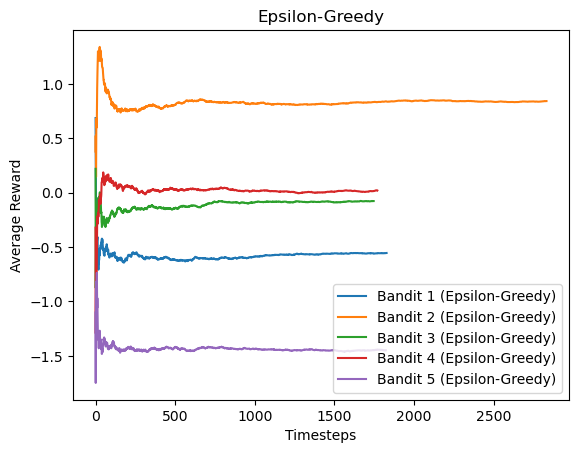

In [5]:
class EpsilonGreedyAgent:
    def __init__(self, epsilon, num_bandits):
        self.epsilon = epsilon
        self.q_values = np.zeros(num_bandits)
        self.action_counts = np.zeros(num_bandits)
    
    def select_action(self):
        if np.random.rand() < self.epsilon:
            # Explore: Randomly choose an action
            chosen_action = np.random.choice(len(self.q_values))
        else:
            # Exploit: Choose the action with the highest estimated reward
            chosen_action = np.argmax(self.q_values)
        return chosen_action
    
    def update_q_values(self, chosen_action, reward):
        self.action_counts[chosen_action] += 1
        self.q_values[chosen_action] += (reward - self.q_values[chosen_action]) / self.action_counts[chosen_action]

# Function to run epsilon-greedy simulation
def run_epsilon_greedy_simulation(agent, bandit, num_steps):
    rewards_per_bandit = [[] for _ in range(len(agent.q_values))]
    

    for _ in range(num_steps):
        chosen_bandit = agent.select_action()
        reward = bandit.pull_bandit(chosen_bandit)
        agent.update_q_values(chosen_bandit, reward)
        rewards_per_bandit[chosen_bandit].append(reward)
        # print(_)
    return rewards_per_bandit

# Simulation parameters for epsilon-greedy
num_bandits_epsilon_greedy = 5
num_steps_epsilon_greedy = 10000
epsilon = 0.9

# Run epsilon-greedy simulation
epsilon_greedy_agent_instance = EpsilonGreedyAgent(epsilon, num_bandits_epsilon_greedy)
rewards_per_bandit_epsilon_greedy = run_epsilon_greedy_simulation(
    epsilon_greedy_agent_instance, Bandit(num_bandits_epsilon_greedy), num_steps_epsilon_greedy
)

# Plotting results for epsilon-greedy
for i, rewards_epsilon_greedy in enumerate(rewards_per_bandit_epsilon_greedy):
    cumulative_average_epsilon_greedy = np.cumsum(rewards_epsilon_greedy) / (np.arange(len(rewards_epsilon_greedy)) + 1)
    plt.plot(cumulative_average_epsilon_greedy, label=f"Bandit {i + 1} (Epsilon-Greedy)")
print(rewards_per_bandit_epsilon_greedy)
# Plotting settings
plt.xlabel("Timesteps")
plt.ylabel("Average Reward")
plt.title("Epsilon-Greedy")
plt.legend()
plt.show()


The result is a plot that shows how the epsilon-greedy agent learns over time, balancing exploration and exploitation. The plot displays the cumulative average reward for each bandit, illustrating how the agent's strategy evolves during the simulation. You can observe how the agent explores initially and gradually focuses on exploiting the bandit with the highest estimated reward.

## **Part 3 : Implementing UCB**

The code below is UCB strategy on a multi-armed bandit problem. The plot helps visualize how the average rewards evolve over time, indicating the performance of the UCB agent in balancing exploration and exploitation.

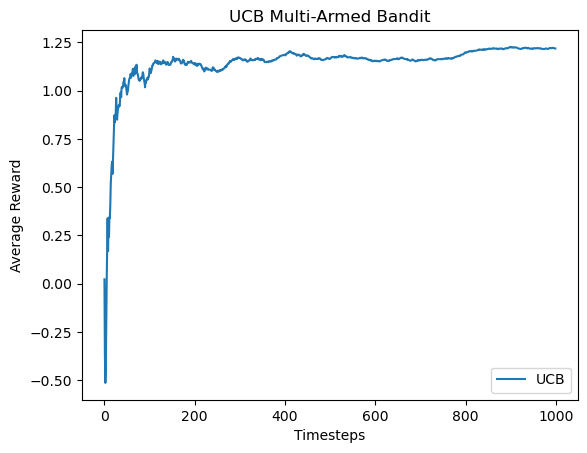

In [6]:
class UCBAgent:
    def __init__(self, num_bandits):
        self.num_bandits = num_bandits
        self.q_values = np.zeros(self.num_bandits)
        self.action_counts = np.zeros(self.num_bandits)
        self.total_pulls = 0
    
    def select_action(self):
        exploration_bonus = np.sqrt(np.log(self.total_pulls + 1) / (self.action_counts + 1e-6))
        ucb_values = self.q_values + exploration_bonus
        chosen_action = np.argmax(ucb_values)
        return chosen_action
    
    def update_q_values(self, chosen_action, reward):
        self.total_pulls += 1
        self.action_counts[chosen_action] += 1
        self.q_values[chosen_action] += (reward - self.q_values[chosen_action]) / self.action_counts[chosen_action]

# Function to run UCB simulation
def run_ucb_simulation(agent, bandit, num_steps):
    rewards = []
    for _ in range(num_steps):
        chosen_bandit = agent.select_action()
        reward = bandit.pull_bandit(chosen_bandit)
        agent.update_q_values(chosen_bandit, reward)
        rewards.append(reward)
    return rewards

# Simulation parameters for UCB
num_bandits_ucb = 3
num_steps_ucb = 1000

# Run UCB simulation
ucb_agent_instance = UCBAgent(num_bandits_ucb)
rewards_ucb = run_ucb_simulation(ucb_agent_instance, Bandit(num_bandits_ucb), num_steps_ucb)

# Plotting results for UCB
cumulative_average_ucb = np.cumsum(rewards_ucb) / (np.arange(len(rewards_ucb)) + 1)
plt.plot(cumulative_average_ucb, label="UCB")

# Plotting settings
plt.xlabel("Timesteps")
plt.ylabel("Average Reward")
plt.title("UCB Multi-Armed Bandit")
plt.legend()
plt.show()


as you can see the result,the performance of the UCB agent and gain insights into how well it balances exploration and exploitation to maximize cumulative rewards in the multi-armed bandit problem.